# Trabalho 1
Matéria: Processamento de Linguagem Natural <br>
Dupla/Matrícula: Bianca Nunes Coelho - 15102880, Raíssa Nunes Coelho - 15102887 <br> 

## Introdução

Multi Class Classification <br>

## Bibliotecas
Bibliotecas do ptyhon utilizadas neste trabalho estão a seguir.

In [115]:
import pandas as pd
import re
import nltk
import spacy
import gensim
import matplotlib.pyplot as plt

## Datasets
Datasets utilizados estão definidos a seguir.

In [116]:
file = "train-00000-of-00001-ecf072e7202447d8.parquet"
df = pd.read_parquet(file, engine= 'pyarrow')

In [117]:
len(df)

3877

In [118]:
df.head(4)

,titulo,texto,link,resumo,categoria,data_hora
0,"Veja a trajetória de Fernando Diniz, em busca ...",Se tem um treinador que sempre foi badalado pe...,https://www.cnnbrasil.com.br/esportes/veja-a-t...,Técnico tricolor e da Seleção Brasileira tem a...,esportes,2023-11-04 12:26:18
1,"Após tempestade com ventos, São Paulo terá sáb...",Após uma tempestade com ventos de mais de 100 ...,https://www.cnnbrasil.com.br/nacional/apos-tem...,"Termômetros devem chegar a 26ºC, esquentando a...",nacional,2023-11-04 12:15:44
2,Como os aplicativos de relacionamento “arruina...,Jenny Nguyen-Don estava com vontade de comer f...,https://www.cnnbrasil.com.br/tecnologia/como-o...,Pessoas em busca de relacionamentos afirmam qu...,tecnologia,2023-11-04 12:15:07
3,Fluminense pode ser o 26º clube a levantar a t...,O Fluminense vai em busca do primeiro título d...,https://www.cnnbrasil.com.br/esportes/fluminen...,"Em busca do título inédito, o Tricolor carioca...",esportes,2023-11-04 12:05:24


## Balanceamento

In [119]:
df['categoria'].value_counts()

esportes           960
nacional           623
internacional      618
economia           562
politica           507
entretenimento     450
tecnologia          44
saude               41
noticias            38
lifestyle           21
branded-content     13
Name: categoria, dtype: int64

<AxesSubplot: >

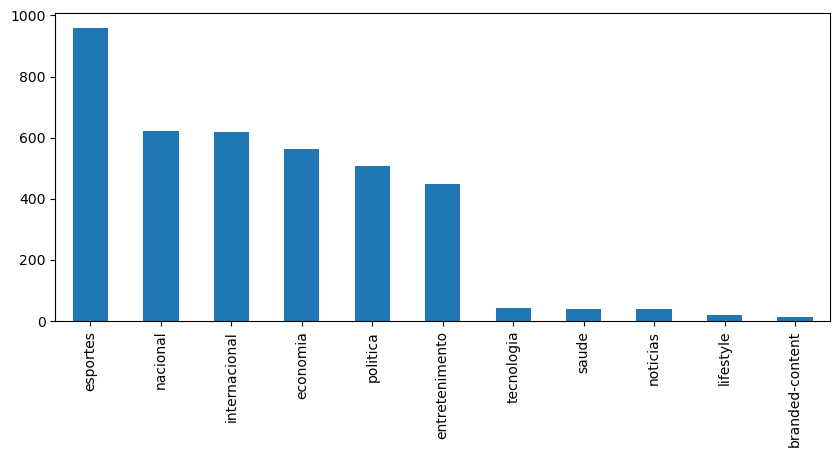

In [120]:
plt.figure(figsize=(10,4))
df.categoria.value_counts().plot(kind='bar')

In [121]:
indice_linha_remover = ['tecnologia',  'saude','noticias','lifestyle','branded-content']

In [122]:
df = df[~df['categoria'].isin(indice_linha_remover)]

In [123]:
df['categoria'].value_counts()

esportes          960
nacional          623
internacional     618
economia          562
politica          507
entretenimento    450
Name: categoria, dtype: int64

In [124]:
# Undersampling
min = df['categoria'].value_counts().min()

amostras = []

for i in df['categoria'].value_counts().index:
    a = df[df['categoria'] == i].sample(min, replace=False)
    amostras.append(a)

df_balanceado = pd.concat(amostras)

In [125]:
df_balanceado['categoria'].value_counts()

esportes          450
nacional          450
internacional     450
economia          450
politica          450
entretenimento    450
Name: categoria, dtype: int64

In [126]:
df_balanceado = df_balanceado.reset_index(drop=True)
df_balanceado.head(5)

,titulo,texto,link,resumo,categoria,data_hora
0,Ex-volante do Corinthians desperta interesse d...,O Corinthians pode se beneficiar com uma negoc...,https://www.cnnbrasil.com.br/esportes/ex-volan...,"Éderson, destaque da Atalanta, desperta intere...",esportes,2023-11-16 20:39:14
1,Risco de rebaixamento do Vasco no Brasileiro d...,O Vasco viu o risco de rebaixamento disparar n...,https://www.cnnbrasil.com.br/esportes/risco-de...,Cruz-Maltino ficou duas vezes à frente no plac...,esportes,2023-11-29 10:07:27
2,Goiás x Cruzeiro: onde assistir e tempo real d...,Goiás e Cruzeiro se enfrentarão nesta segunda-...,https://www.cnnbrasil.com.br/esportes/goias-x-...,Onde assistir e tempo real dos lances e das es...,esportes,2023-11-27 11:12:47
3,Barcelona empata e perde a chance de encostar ...,Em compromisso válido pela 14ª rodada de LALIG...,https://www.cnnbrasil.com.br/esportes/barcelon...,Distância de pontos para os primeiros colocado...,esportes,2023-11-25 16:50:34
4,Fortaleza atinge a pior sequência sem vitórias...,Faz exatamente um mês que o Fortaleza conquist...,https://www.cnnbrasil.com.br/esportes/fortalez...,"São seis jogos sem ganhar, cinco pelo Brasilei...",esportes,2023-11-09 10:04:18


In [127]:
df_balanceado2 = df_balanceado.copy()
df_balanceado3 = df_balanceado.copy()

In [128]:
df_balanceado2.head()

,titulo,texto,link,resumo,categoria,data_hora
0,Ex-volante do Corinthians desperta interesse d...,O Corinthians pode se beneficiar com uma negoc...,https://www.cnnbrasil.com.br/esportes/ex-volan...,"Éderson, destaque da Atalanta, desperta intere...",esportes,2023-11-16 20:39:14
1,Risco de rebaixamento do Vasco no Brasileiro d...,O Vasco viu o risco de rebaixamento disparar n...,https://www.cnnbrasil.com.br/esportes/risco-de...,Cruz-Maltino ficou duas vezes à frente no plac...,esportes,2023-11-29 10:07:27
2,Goiás x Cruzeiro: onde assistir e tempo real d...,Goiás e Cruzeiro se enfrentarão nesta segunda-...,https://www.cnnbrasil.com.br/esportes/goias-x-...,Onde assistir e tempo real dos lances e das es...,esportes,2023-11-27 11:12:47
3,Barcelona empata e perde a chance de encostar ...,Em compromisso válido pela 14ª rodada de LALIG...,https://www.cnnbrasil.com.br/esportes/barcelon...,Distância de pontos para os primeiros colocado...,esportes,2023-11-25 16:50:34
4,Fortaleza atinge a pior sequência sem vitórias...,Faz exatamente um mês que o Fortaleza conquist...,https://www.cnnbrasil.com.br/esportes/fortalez...,"São seis jogos sem ganhar, cinco pelo Brasilei...",esportes,2023-11-09 10:04:18


In [130]:
df_balanceado3.head()

,titulo,texto,link,resumo,categoria,data_hora
0,Ex-volante do Corinthians desperta interesse d...,O Corinthians pode se beneficiar com uma negoc...,https://www.cnnbrasil.com.br/esportes/ex-volan...,"Éderson, destaque da Atalanta, desperta intere...",esportes,2023-11-16 20:39:14
1,Risco de rebaixamento do Vasco no Brasileiro d...,O Vasco viu o risco de rebaixamento disparar n...,https://www.cnnbrasil.com.br/esportes/risco-de...,Cruz-Maltino ficou duas vezes à frente no plac...,esportes,2023-11-29 10:07:27
2,Goiás x Cruzeiro: onde assistir e tempo real d...,Goiás e Cruzeiro se enfrentarão nesta segunda-...,https://www.cnnbrasil.com.br/esportes/goias-x-...,Onde assistir e tempo real dos lances e das es...,esportes,2023-11-27 11:12:47
3,Barcelona empata e perde a chance de encostar ...,Em compromisso válido pela 14ª rodada de LALIG...,https://www.cnnbrasil.com.br/esportes/barcelon...,Distância de pontos para os primeiros colocado...,esportes,2023-11-25 16:50:34
4,Fortaleza atinge a pior sequência sem vitórias...,Faz exatamente um mês que o Fortaleza conquist...,https://www.cnnbrasil.com.br/esportes/fortalez...,"São seis jogos sem ganhar, cinco pelo Brasilei...",esportes,2023-11-09 10:04:18


In [131]:
# pega coluna
text = df_balanceado['texto'] # para NLTK
text2 = df_balanceado2['texto'] # para spaCy
text3 = df_balanceado3['texto'] # para Gensim
len(text)

2700

In [132]:
text[0]

'O Corinthians pode se beneficiar com uma negociação importante no futebol europeu. O volante Éderson, que atuou pelo Timão em 2020, e atualmente defende a Atalanta, da Itália, despertou interesse do Barcelona para 2024. A informação foi publicada pelo renomado jornal espanhol Mundo Deportivo. O Corinthians tem direito a 1% do valor das próximas vendas do meio-campista, hoje avaliado em 20 milhões de euros (aproximadamente R$106 milhões na cotação atual).  Leia Mais  Caso o valor seja a base da próxima transferência, o Timão poderia embolsar cerca de 200 mil euros (R$1,06 milhão). O percentual diz respeito aos mecanismos de solidariedade estipulados pela Federação Internacional das Associações de Futebol (FIFA). A legislação busca indenizar os clubes que participaram da formação do atleta entre os 14 e 23 anos de idade. Éderson esteve no Corinthians quando tinha entre 21 e 22 anos. Após um início interessante no Timão, anotando três gols consecutivos, em 2020, Éderson oscilou no clube 

In [133]:
categorias = ['esportes','nacional', 'internacional', 'economia', 'politica', 'entretenimento']

## Pré-processamento

### NLTK

In [134]:
for i in range(len(text)):
    text[i] = text[i].lower()

In [135]:
from unidecode import unidecode

for i in range(len(text)):
    text[i] = unidecode(text[i])

In [136]:
for i in range(len(text)):
    text[i] = re.sub(r'[^a-zA-Z\s]', "" ,text[i])

In [137]:
print(text[0])

o corinthians pode se beneficiar com uma negociacao importante no futebol europeu o volante ederson que atuou pelo timao em  e atualmente defende a atalanta da italia despertou interesse do barcelona para  a informacao foi publicada pelo renomado jornal espanhol mundo deportivo o corinthians tem direito a  do valor das proximas vendas do meiocampista hoje avaliado em  milhoes de euros aproximadamente r milhoes na cotacao atual  leia mais  caso o valor seja a base da proxima transferencia o timao poderia embolsar cerca de  mil euros r milhao o percentual diz respeito aos mecanismos de solidariedade estipulados pela federacao internacional das associacoes de futebol fifa a legislacao busca indenizar os clubes que participaram da formacao do atleta entre os  e  anos de idade ederson esteve no corinthians quando tinha entre  e  anos apos um inicio interessante no timao anotando tres gols consecutivos em  ederson oscilou no clube e foi emprestado ao fortaleza em duas oportunidades onde obte

In [138]:
token_text = []

for j in text:
    token_text.append(nltk.word_tokenize(j))

In [139]:
print(token_text[0])

['o', 'corinthians', 'pode', 'se', 'beneficiar', 'com', 'uma', 'negociacao', 'importante', 'no', 'futebol', 'europeu', 'o', 'volante', 'ederson', 'que', 'atuou', 'pelo', 'timao', 'em', 'e', 'atualmente', 'defende', 'a', 'atalanta', 'da', 'italia', 'despertou', 'interesse', 'do', 'barcelona', 'para', 'a', 'informacao', 'foi', 'publicada', 'pelo', 'renomado', 'jornal', 'espanhol', 'mundo', 'deportivo', 'o', 'corinthians', 'tem', 'direito', 'a', 'do', 'valor', 'das', 'proximas', 'vendas', 'do', 'meiocampista', 'hoje', 'avaliado', 'em', 'milhoes', 'de', 'euros', 'aproximadamente', 'r', 'milhoes', 'na', 'cotacao', 'atual', 'leia', 'mais', 'caso', 'o', 'valor', 'seja', 'a', 'base', 'da', 'proxima', 'transferencia', 'o', 'timao', 'poderia', 'embolsar', 'cerca', 'de', 'mil', 'euros', 'r', 'milhao', 'o', 'percentual', 'diz', 'respeito', 'aos', 'mecanismos', 'de', 'solidariedade', 'estipulados', 'pela', 'federacao', 'internacional', 'das', 'associacoes', 'de', 'futebol', 'fifa', 'a', 'legislacao

In [140]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/hworld/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [141]:
from nltk.corpus import stopwords
sw = stopwords.words('portuguese')

In [142]:
for stop in sw:
    for text in token_text:
        for t in text:
            if(t == stop):
                text.remove(t)

In [143]:
print(token_text[0])

['corinthians', 'pode', 'beneficiar', 'negociacao', 'importante', 'futebol', 'europeu', 'volante', 'ederson', 'atuou', 'timao', 'atualmente', 'defende', 'atalanta', 'italia', 'despertou', 'interesse', 'barcelona', 'informacao', 'publicada', 'renomado', 'jornal', 'espanhol', 'mundo', 'deportivo', 'corinthians', 'direito', 'valor', 'proximas', 'vendas', 'meiocampista', 'hoje', 'avaliado', 'milhoes', 'euros', 'aproximadamente', 'r', 'milhoes', 'cotacao', 'atual', 'leia', 'caso', 'valor', 'base', 'proxima', 'transferencia', 'timao', 'poderia', 'embolsar', 'cerca', 'mil', 'euros', 'r', 'milhao', 'percentual', 'diz', 'respeito', 'mecanismos', 'solidariedade', 'estipulados', 'federacao', 'internacional', 'associacoes', 'futebol', 'fifa', 'legislacao', 'busca', 'indenizar', 'clubes', 'participaram', 'formacao', 'atleta', 'anos', 'idade', 'ederson', 'corinthians', 'anos', 'apos', 'inicio', 'interessante', 'timao', 'anotando', 'tres', 'gols', 'consecutivos', 'ederson', 'oscilou', 'clube', 'empre

In [144]:
df_balanceado['texto'] = token_text
df_balanceado.head(2)

,titulo,texto,link,resumo,categoria,data_hora
0,Ex-volante do Corinthians desperta interesse d...,"[corinthians, pode, beneficiar, negociacao, im...",https://www.cnnbrasil.com.br/esportes/ex-volan...,"Éderson, destaque da Atalanta, desperta intere...",esportes,2023-11-16 20:39:14
1,Risco de rebaixamento do Vasco no Brasileiro d...,"[vasco, viu, risco, rebaixamento, disparar, ca...",https://www.cnnbrasil.com.br/esportes/risco-de...,Cruz-Maltino ficou duas vezes à frente no plac...,esportes,2023-11-29 10:07:27


### spaCy

In [145]:
for i in range(len(text2)):
    text2[i] = text2[i].lower()

In [146]:
from unidecode import unidecode

for i in range(len(text2)):
    text2[i] = unidecode(text2[i])

In [147]:
for i in range(len(text2)):
   text2[i] = re.sub(r'[^a-zA-Z\s]', "" ,text2[i])

In [148]:
print(text2[0])

o corinthians pode se beneficiar com uma negociacao importante no futebol europeu o volante ederson que atuou pelo timao em  e atualmente defende a atalanta da italia despertou interesse do barcelona para  a informacao foi publicada pelo renomado jornal espanhol mundo deportivo o corinthians tem direito a  do valor das proximas vendas do meiocampista hoje avaliado em  milhoes de euros aproximadamente r milhoes na cotacao atual  leia mais  caso o valor seja a base da proxima transferencia o timao poderia embolsar cerca de  mil euros r milhao o percentual diz respeito aos mecanismos de solidariedade estipulados pela federacao internacional das associacoes de futebol fifa a legislacao busca indenizar os clubes que participaram da formacao do atleta entre os  e  anos de idade ederson esteve no corinthians quando tinha entre  e  anos apos um inicio interessante no timao anotando tres gols consecutivos em  ederson oscilou no clube e foi emprestado ao fortaleza em duas oportunidades onde obte

In [149]:
nlp = spacy.load('pt_core_news_sm')

doc = []

for j in text2:
    temp = nlp(j)
    doc.append(temp)
print(doc[0])

o corinthians pode se beneficiar com uma negociacao importante no futebol europeu o volante ederson que atuou pelo timao em  e atualmente defende a atalanta da italia despertou interesse do barcelona para  a informacao foi publicada pelo renomado jornal espanhol mundo deportivo o corinthians tem direito a  do valor das proximas vendas do meiocampista hoje avaliado em  milhoes de euros aproximadamente r milhoes na cotacao atual  leia mais  caso o valor seja a base da proxima transferencia o timao poderia embolsar cerca de  mil euros r milhao o percentual diz respeito aos mecanismos de solidariedade estipulados pela federacao internacional das associacoes de futebol fifa a legislacao busca indenizar os clubes que participaram da formacao do atleta entre os  e  anos de idade ederson esteve no corinthians quando tinha entre  e  anos apos um inicio interessante no timao anotando tres gols consecutivos em  ederson oscilou no clube e foi emprestado ao fortaleza em duas oportunidades onde obte

In [150]:
token_text2 = []

#Creating and updating our list of tokens using list comprehension 
for i in range(len(text2)):
    temp = [token.text for token in doc[i] if not token.is_space]
    token_text2.append(temp)

print(token_text2[0])

['o', 'corinthians', 'pode', 'se', 'beneficiar', 'com', 'uma', 'negociacao', 'importante', 'no', 'futebol', 'europeu', 'o', 'volante', 'ederson', 'que', 'atuou', 'pelo', 'timao', 'em', 'e', 'atualmente', 'defende', 'a', 'atalanta', 'da', 'italia', 'despertou', 'interesse', 'do', 'barcelona', 'para', 'a', 'informacao', 'foi', 'publicada', 'pelo', 'renomado', 'jornal', 'espanhol', 'mundo', 'deportivo', 'o', 'corinthians', 'tem', 'direito', 'a', 'do', 'valor', 'das', 'proximas', 'vendas', 'do', 'meiocampista', 'hoje', 'avaliado', 'em', 'milhoes', 'de', 'euros', 'aproximadamente', 'r', 'milhoes', 'na', 'cotacao', 'atual', 'leia', 'mais', 'caso', 'o', 'valor', 'seja', 'a', 'base', 'da', 'proxima', 'transferencia', 'o', 'timao', 'poderia', 'embolsar', 'cerca', 'de', 'mil', 'euros', 'r', 'milhao', 'o', 'percentual', 'diz', 'respeito', 'aos', 'mecanismos', 'de', 'solidariedade', 'estipulados', 'pela', 'federacao', 'internacional', 'das', 'associacoes', 'de', 'futebol', 'fifa', 'a', 'legislacao

In [151]:
from spacy.lang.pt.stop_words import STOP_WORDS
stop = STOP_WORDS
print(stop)

{'duas', 'diante', 'dão', 'fazeis', 'num', 'estão', 'perto', 'desse', 'vós', 'és', 'vossos', 'meio', 'dezoito', 'embora', 'nossa', 'meu', 'estiveram', 'cedo', 'vários', 'te', 'apontar', 'teus', 'mas', 'tais', 'conhecida', 'nova', 'tens', 'demais', 'desde', 'lhe', 'ali', 'tanta', 'ter', 'sétima', 'fazia', 'fim', 'tendes', 'algo', 'esta', 'vosso', 'vindo', 'terceiro', 'local', 'mil', 'dos', 'puderam', 'posição', 'des', 'das', 'comprida', 'poderá', 'ele', 'ponto', 'fazem', 'nunca', 'agora', 'à', 'quê', 'vem', 'obrigada', 'vêm', 'quinze', 'sete', 'catorze', 'todas', 'na', 'onde', 'toda', 'pouca', 'ou', 'números', 'pouco', 'tu', 'ambas', 'entre', 'através', 'vais', 'parece', 'caminho', 'veja', 'seis', 'apoio', 'você', 'breve', 'nossos', 'naquele', 'esteve', 'porquê', 'essas', 'coisa', 'faço', 'sem', 'antes', 'deverá', 'porém', 'novos', 'final', 'nós', 'muitos', 'oitavo', 'aquela', 'se', 'mal', 'estivestes', 'terceira', 'outra', 'quais', 'põem', 'tempo', 'oito', 'podia', 'eventual', 'após', 

In [152]:
token2 = []
for i in token_text2:
    temp = []
    for token in i:
        if token not in stop:
            temp.append(token)
    token2.append(temp)
print(token2[0])

['corinthians', 'beneficiar', 'negociacao', 'importante', 'futebol', 'europeu', 'volante', 'ederson', 'atuou', 'timao', 'atualmente', 'defende', 'atalanta', 'italia', 'despertou', 'interesse', 'barcelona', 'informacao', 'publicada', 'renomado', 'jornal', 'espanhol', 'mundo', 'deportivo', 'corinthians', 'direito', 'proximas', 'vendas', 'meiocampista', 'hoje', 'avaliado', 'milhoes', 'euros', 'aproximadamente', 'r', 'milhoes', 'cotacao', 'atual', 'leia', 'caso', 'seja', 'base', 'proxima', 'transferencia', 'timao', 'poderia', 'embolsar', 'cerca', 'euros', 'r', 'milhao', 'percentual', 'respeito', 'mecanismos', 'solidariedade', 'estipulados', 'federacao', 'internacional', 'associacoes', 'futebol', 'fifa', 'legislacao', 'busca', 'indenizar', 'clubes', 'participaram', 'formacao', 'atleta', 'anos', 'idade', 'ederson', 'corinthians', 'tinha', 'anos', 'apos', 'interessante', 'timao', 'anotando', 'tres', 'gols', 'consecutivos', 'ederson', 'oscilou', 'clube', 'emprestado', 'fortaleza', 'oportunidad

In [153]:
df_balanceado2['texto'] = token2
df_balanceado2.head(2)

,titulo,texto,link,resumo,categoria,data_hora
0,Ex-volante do Corinthians desperta interesse d...,"[corinthians, beneficiar, negociacao, importan...",https://www.cnnbrasil.com.br/esportes/ex-volan...,"Éderson, destaque da Atalanta, desperta intere...",esportes,2023-11-16 20:39:14
1,Risco de rebaixamento do Vasco no Brasileiro d...,"[vasco, viu, risco, rebaixamento, disparar, ca...",https://www.cnnbrasil.com.br/esportes/risco-de...,Cruz-Maltino ficou duas vezes à frente no plac...,esportes,2023-11-29 10:07:27


### Gensim

In [154]:
from gensim.utils import simple_preprocess
from gensim.utils import tokenize

for i in range(len(text3)):
    text3[i] = text3[i].lower()

In [155]:
from unidecode import unidecode

for i in range(len(text3)):
    text3[i] = unidecode(text3[i])

In [156]:
for i in range(len(text3)):
   text3[i] = re.sub(r'[^a-zA-Z\s]', "" ,text3[i])

In [157]:
text3[0]

'o corinthians pode se beneficiar com uma negociacao importante no futebol europeu o volante ederson que atuou pelo timao em  e atualmente defende a atalanta da italia despertou interesse do barcelona para  a informacao foi publicada pelo renomado jornal espanhol mundo deportivo o corinthians tem direito a  do valor das proximas vendas do meiocampista hoje avaliado em  milhoes de euros aproximadamente r milhoes na cotacao atual  leia mais  caso o valor seja a base da proxima transferencia o timao poderia embolsar cerca de  mil euros r milhao o percentual diz respeito aos mecanismos de solidariedade estipulados pela federacao internacional das associacoes de futebol fifa a legislacao busca indenizar os clubes que participaram da formacao do atleta entre os  e  anos de idade ederson esteve no corinthians quando tinha entre  e  anos apos um inicio interessante no timao anotando tres gols consecutivos em  ederson oscilou no clube e foi emprestado ao fortaleza em duas oportunidades onde obt

In [158]:
tokens3 = []

for i in range(len(text3)):
    tokens3.append(list(tokenize(text3[i])))

print(tokens3[0])

['o', 'corinthians', 'pode', 'se', 'beneficiar', 'com', 'uma', 'negociacao', 'importante', 'no', 'futebol', 'europeu', 'o', 'volante', 'ederson', 'que', 'atuou', 'pelo', 'timao', 'em', 'e', 'atualmente', 'defende', 'a', 'atalanta', 'da', 'italia', 'despertou', 'interesse', 'do', 'barcelona', 'para', 'a', 'informacao', 'foi', 'publicada', 'pelo', 'renomado', 'jornal', 'espanhol', 'mundo', 'deportivo', 'o', 'corinthians', 'tem', 'direito', 'a', 'do', 'valor', 'das', 'proximas', 'vendas', 'do', 'meiocampista', 'hoje', 'avaliado', 'em', 'milhoes', 'de', 'euros', 'aproximadamente', 'r', 'milhoes', 'na', 'cotacao', 'atual', 'leia', 'mais', 'caso', 'o', 'valor', 'seja', 'a', 'base', 'da', 'proxima', 'transferencia', 'o', 'timao', 'poderia', 'embolsar', 'cerca', 'de', 'mil', 'euros', 'r', 'milhao', 'o', 'percentual', 'diz', 'respeito', 'aos', 'mecanismos', 'de', 'solidariedade', 'estipulados', 'pela', 'federacao', 'internacional', 'das', 'associacoes', 'de', 'futebol', 'fifa', 'a', 'legislacao

In [159]:
stopwords = [ 'a', 'à', 'adeus', 'agora', 'aí', 'ainda', 'além', 'algo', 'alguém', 'algum', 'alguma', 'algumas', 'alguns', 'ali', 'ampla', 'amplas', 'amplo', 'amplos', 'ano', 'anos', 'ante', 'antes', 'ao', 'aos', 'apenas', 'apoio', 'após', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aqui', 'aquilo', 'área', 'as', 'às', 'assim', 'até', 'atrás', 'através', 'baixo', 'bastante', 'bem', 'boa', 'boas', 'bom', 'bons', 'breve', 'cá', 'cada', 'catorze', 'cedo', 'cento', 'certamente', 'certeza', 'cima', 'cinco', 'coisa', 'coisas', 'com', 'como', 'conselho', 'contra', 'contudo', 'custa', 'da', 'dá', 'dão', 'daquela', 'daquelas', 'daquele', 'daqueles', 'dar', 'das', 'de', 'debaixo', 'dela', 'delas', 'dele', 'deles', 'demais', 'dentro', 'depois', 'desde', 'dessa', 'dessas', 'desse', 'desses', 'desta', 'destas', 'deste', 'destes', 'deve', 'devem', 'devendo', 'dever', 'deverá', 'deverão', 'deveria', 'deveriam', 'devia', 'deviam', 'dez', 'dezanove', 'dezasseis', 'dezassete', 'dezoito', 'dia', 'diante', 'disse', 'disso', 'disto', 'dito', 'diz', 'dizem', 'dizer', 'do', 'dois', 'dos', 'doze', 'duas', 'dúvida', 'e', 'é', 'ela', 'elas', 'ele', 'eles', 'em', 'embora', 'enquanto', 'entre', 'era', 'eram', 'éramos', 'és', 'essa', 'essas', 'esse', 'esses', 'esta', 'está', 'estamos', 'estão', 'estar', 'estas', 'estás', 'estava', 'estavam', 'estávamos', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estivéramos', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivéssemos', 'estiveste', 'estivestes', 'estou', 'etc', 'eu', 'exemplo', 'faço', 'falta', 'favor', 'faz', 'fazeis', 'fazem', 'fazemos', 'fazendo', 'fazer', 'fazes', 'feita', 'feitas', 'feito', 'feitos', 'fez', 'fim', 'final', 'foi', 'fomos', 'for', 'fora', 'foram', 'fôramos', 'forem', 'forma', 'formos', 'fosse', 'fossem', 'fôssemos', 'foste', 'fostes', 'fui', 'geral', 'grande', 'grandes', 'grupo', 'há', 'haja', 'hajam', 'hajamos', 'hão', 'havemos', 'havia', 'hei', 'hoje', 'hora', 'horas', 'houve', 'houvemos', 'houver', 'houvera', 'houverá', 'houveram', 'houvéramos', 'houverão', 'houverei', 'houverem', 'houveremos', 'houveria', 'houveriam', 'houveríamos', 'houvermos', 'houvesse', 'houvessem', 'houvéssemos', 'isso', 'isto', 'já', 'la', 'lá', 'lado', 'lhe', 'lhes', 'lo', 'local', 'logo', 'longe', 'lugar', 'maior', 'maioria', 'mais', 'mal', 'mas', 'máximo', 'me', 'meio', 'menor', 'menos', 'mês', 'meses', 'mesma', 'mesmas', 'mesmo', 'mesmos', 'meu', 'meus', 'mil', 'minha', 'minhas', 'momento', 'muita', 'muitas', 'muito', 'muitos', 'na', 'nada', 'não', 'naquela', 'naquelas', 'naquele', 'naqueles', 'nas', 'nem', 'nenhum', 'nenhuma', 'nessa', 'nessas', 'nesse', 'nesses', 'nesta', 'nestas', 'neste', 'nestes', 'ninguém', 'nível', 'no', 'noite', 'nome', 'nos', 'nós', 'nossa', 'nossas', 'nosso', 'nossos', 'nova', 'novas', 'nove', 'novo', 'novos', 'num', 'numa', 'número', 'nunca', 'o', 'obra', 'obrigada', 'obrigado', 'oitava', 'oitavo', 'oito', 'onde', 'ontem', 'onze', 'os', 'ou', 'outra', 'outras', 'outro', 'outros', 'para', 'parece', 'parte', 'partir', 'paucas', 'pela', 'pelas', 'pelo', 'pelos', 'pequena', 'pequenas', 'pequeno', 'pequenos', 'per', 'perante', 'perto', 'pode', 'pude', 'pôde', 'podem', 'podendo', 'poder', 'poderia', 'poderiam', 'podia', 'podiam', 'põe', 'põem', 'pois', 'ponto', 'pontos', 'por', 'porém', 'porque', 'porquê', 'posição', 'possível', 'possivelmente', 'posso', 'pouca', 'poucas', 'pouco', 'poucos', 'primeira', 'primeiras', 'primeiro', 'primeiros', 'própria', 'próprias', 'próprio', 'próprios', 'próxima', 'próximas', 'próximo', 'próximos', 'pude', 'puderam', 'quais', 'quáis', 'qual', 'quando', 'quanto', 'quantos', 'quarta', 'quarto', 'quatro', 'que', 'quê', 'quem', 'quer', 'quereis', 'querem', 'queremas', 'queres', 'quero', 'questão', 'quinta', 'quinto', 'quinze', 'relação', 'sabe', 'sabem', 'são', 'se', 'segunda', 'segundo', 'sei', 'seis', 'seja', 'sejam', 'sejamos', 'sem', 'sempre', 'sendo', 'ser', 'será', 'serão', 'serei', 'seremos', 'seria', 'seriam', 'seríamos', 'sete', 'sétima', 'sétimo', 'seu', 'seus', 'sexta', 'sexto', 'si', 'sido', 'sim', 'sistema', 'só', 'sob', 'sobre', 'sois', 'somos', 'sou', 'sua', 'suas', 'tal', 'talvez', 'também', 'tampouco', 'tanta', 'tantas', 'tanto', 'tão', 'tarde', 'te', 'tem', 'tém', 'têm', 'temos', 'tendes', 'tendo', 'tenha', 'tenham', 'tenhamos', 'tenho', 'tens', 'ter', 'terá', 'terão', 'terceira', 'terceiro', 'terei', 'teremos', 'teria', 'teriam', 'teríamos', 'teu', 'teus', 'teve', 'ti', 'tido', 'tinha', 'tinham', 'tínhamos', 'tive', 'tivemos', 'tiver', 'tivera', 'tiveram', 'tivéramos', 'tiverem', 'tivermos', 'tivesse', 'tivessem', 'tivéssemos', 'tiveste', 'tivestes', 'toda', 'todas', 'todavia', 'todo', 'todos', 'trabalho', 'três', 'treze', 'tu', 'tua', 'tuas', 'tudo', 'última', 'últimas', 'último', 'últimos', 'um', 'uma', 'umas', 'uns', 'vai', 'vais', 'vão', 'vários', 'vem', 'vêm', 'vendo', 'vens', 'ver', 'vez', 'vezes', 'viagem', 'vindo', 'vinte', 'vir', 'você', 'vocês', 'vos', 'vós', 'vossa', 'vossas', 'vosso', 'vossos', 'zero', '1', '2', '3', '4', '5', '6', '7', '8', '9', '0', '_' ]

print(stopwords)

['a', 'à', 'adeus', 'agora', 'aí', 'ainda', 'além', 'algo', 'alguém', 'algum', 'alguma', 'algumas', 'alguns', 'ali', 'ampla', 'amplas', 'amplo', 'amplos', 'ano', 'anos', 'ante', 'antes', 'ao', 'aos', 'apenas', 'apoio', 'após', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aqui', 'aquilo', 'área', 'as', 'às', 'assim', 'até', 'atrás', 'através', 'baixo', 'bastante', 'bem', 'boa', 'boas', 'bom', 'bons', 'breve', 'cá', 'cada', 'catorze', 'cedo', 'cento', 'certamente', 'certeza', 'cima', 'cinco', 'coisa', 'coisas', 'com', 'como', 'conselho', 'contra', 'contudo', 'custa', 'da', 'dá', 'dão', 'daquela', 'daquelas', 'daquele', 'daqueles', 'dar', 'das', 'de', 'debaixo', 'dela', 'delas', 'dele', 'deles', 'demais', 'dentro', 'depois', 'desde', 'dessa', 'dessas', 'desse', 'desses', 'desta', 'destas', 'deste', 'destes', 'deve', 'devem', 'devendo', 'dever', 'deverá', 'deverão', 'deveria', 'deveriam', 'devia', 'deviam', 'dez', 'dezanove', 'dezasseis', 'dezassete', 'dezoito', 'dia', 'diante', 'disse', 'di

In [160]:
token3 = []
for i in tokens3:
    temp = []
    for token in i:
        if token not in stopwords:
            temp.append(token)
    token3.append(temp)
print(token3[0])

['corinthians', 'beneficiar', 'negociacao', 'importante', 'futebol', 'europeu', 'volante', 'ederson', 'atuou', 'timao', 'atualmente', 'defende', 'atalanta', 'italia', 'despertou', 'interesse', 'barcelona', 'informacao', 'publicada', 'renomado', 'jornal', 'espanhol', 'mundo', 'deportivo', 'corinthians', 'direito', 'valor', 'proximas', 'vendas', 'meiocampista', 'avaliado', 'milhoes', 'euros', 'aproximadamente', 'r', 'milhoes', 'cotacao', 'atual', 'leia', 'caso', 'valor', 'base', 'proxima', 'transferencia', 'timao', 'embolsar', 'cerca', 'euros', 'r', 'milhao', 'percentual', 'respeito', 'mecanismos', 'solidariedade', 'estipulados', 'federacao', 'internacional', 'associacoes', 'futebol', 'fifa', 'legislacao', 'busca', 'indenizar', 'clubes', 'participaram', 'formacao', 'atleta', 'idade', 'ederson', 'corinthians', 'apos', 'inicio', 'interessante', 'timao', 'anotando', 'tres', 'gols', 'consecutivos', 'ederson', 'oscilou', 'clube', 'emprestado', 'fortaleza', 'oportunidades', 'obteve', 'destaque

In [161]:
df_balanceado3['texto'] = token3
df_balanceado3.head(2)

,titulo,texto,link,resumo,categoria,data_hora
0,Ex-volante do Corinthians desperta interesse d...,"[corinthians, beneficiar, negociacao, importan...",https://www.cnnbrasil.com.br/esportes/ex-volan...,"Éderson, destaque da Atalanta, desperta intere...",esportes,2023-11-16 20:39:14
1,Risco de rebaixamento do Vasco no Brasileiro d...,"[vasco, viu, risco, rebaixamento, disparar, ca...",https://www.cnnbrasil.com.br/esportes/risco-de...,Cruz-Maltino ficou duas vezes à frente no plac...,esportes,2023-11-29 10:07:27


## Análises

### NLTK

In [187]:
# Contagem de frequência de palavras usando NLTK 

#from collections import Counter
#frequencia_palavras = Counter(token_text[0]) 
#print(frequencia_palavras.most_common(10))

from nltk.probability import FreqDist

freq_dist = FreqDist(token_text[0])
# Exibição da frequência de cada palavra
#for token, freq in freq_dist.items():
#    print(token, freq)

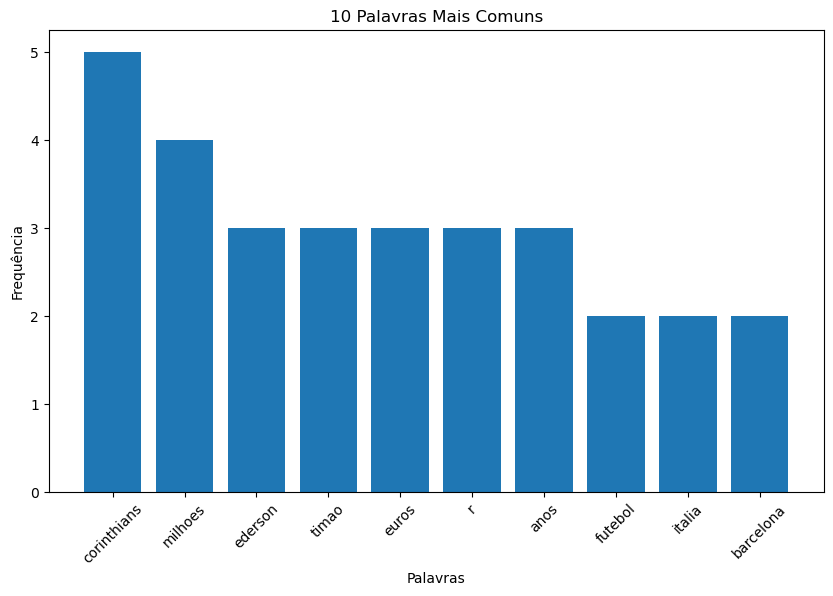

In [173]:
# Obter os 10 tokens mais comuns e suas contagens
tokens_mais_comuns = freq_dist.most_common(10)
palavras, contagens = zip(*tokens_mais_comuns)

# Gráfico de Barras
plt.figure(figsize=(10, 6))
plt.bar(palavras, contagens)
plt.xlabel('Palavras')
plt.ylabel('Frequência')
plt.title('10 Palavras Mais Comuns')
plt.xticks(rotation=45)
plt.show()

### spaCy

In [203]:
from spacy.attrs import ORTH # Contagem de frequência de palavras usando Spacy

doc_sp = nlp(" ".join(token2[0]))

count_dict = doc_sp.count_by(ORTH)

In [205]:
sorted_counts = sorted(count_dict.items(), key=lambda item: item[1], reverse=True)

# 10 mais frequentes
top_10_frequent_words = sorted_counts[:10]

# Print
for word, count in top_10_frequent_words:
    print(nlp.vocab.strings[word], count)

corinthians 5
milhoes 4
ederson 3
timao 3
euros 3
r 3
anos 3
futebol 2
italia 2
barcelona 2


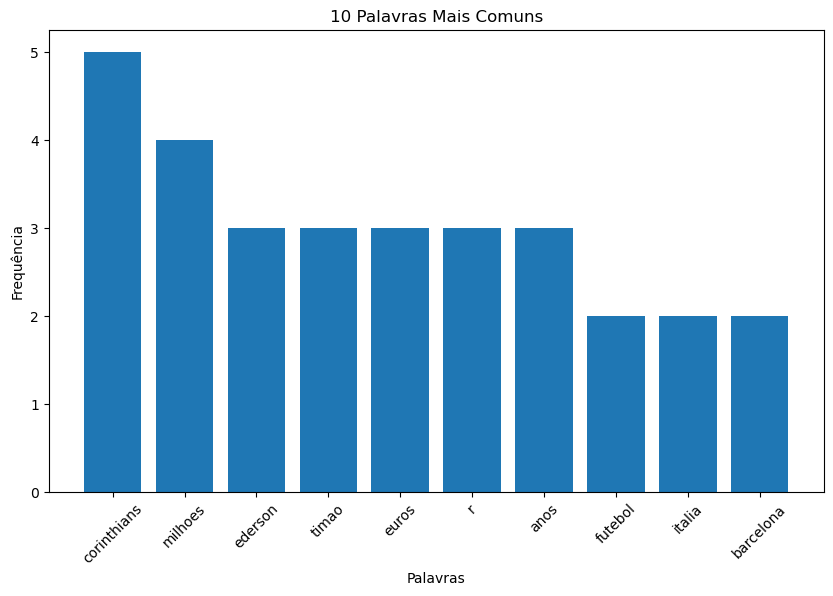

In [206]:
palavras = []
contagens = []
# Obter os 10 tokens mais comuns e suas contagens
for word, count in top_10_frequent_words:
    palavras.append(nlp.vocab.strings[word])
    contagens.append(count)

# Gráfico de Barras
plt.figure(figsize=(10, 6))
plt.bar(palavras, contagens)
plt.xlabel('Palavras')
plt.ylabel('Frequência')
plt.title('10 Palavras Mais Comuns')
plt.xticks(rotation=45)
plt.show()

### Gensim

In [223]:
from gensim import corpora

dictionary = corpora.Dictionary(token3) 
corpus = [dictionary.doc2bow(text) for text in token3]
print(corpus[1])

[(20, 1), (21, 1), (23, 1), (53, 1), (57, 1), (70, 1), (71, 1), (90, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 2), (100, 1), (101, 1), (102, 1), (103, 2), (104, 1), (105, 1), (106, 1), (107, 1), (108, 1), (109, 1), (110, 1), (111, 1), (112, 1), (113, 1), (114, 1), (115, 2), (116, 1), (117, 1), (118, 1), (119, 1), (120, 2), (121, 1), (122, 1), (123, 1), (124, 1), (125, 1), (126, 1), (127, 1), (128, 1), (129, 1), (130, 1), (131, 1), (132, 4), (133, 1), (134, 1), (135, 1), (136, 3), (137, 1), (138, 3), (139, 2), (140, 1), (141, 1), (142, 1), (143, 1), (144, 4), (145, 1), (146, 1), (147, 1), (148, 1)]


In [240]:
mapping = {v: k for k, v in dictionary.token2id.items()}
ttt = [[(mapping[i[0]], i[1]) for i in item] for item in corpus]
print(ttt[0])

[('anotando', 1), ('apos', 1), ('aproximadamente', 1), ('associacoes', 1), ('atalanta', 1), ('atleta', 1), ('atual', 1), ('atualmente', 1), ('atuou', 1), ('avaliado', 1), ('barcelona', 2), ('base', 1), ('beneficiar', 1), ('busca', 1), ('camisa', 1), ('caso', 2), ('cerca', 1), ('clube', 1), ('clubes', 1), ('consecutivos', 1), ('conteudo', 1), ('corinthians', 5), ('cotacao', 1), ('criado', 1), ('defende', 1), ('deportivo', 1), ('despertou', 1), ('destaque', 1), ('direito', 1), ('ederson', 3), ('embolsar', 1), ('emprestado', 1), ('epoca', 1), ('espanhol', 1), ('estipulados', 1), ('europeu', 1), ('euros', 3), ('federacao', 1), ('fifa', 1), ('formacao', 1), ('fortaleza', 1), ('futebol', 2), ('gabriel', 1), ('gols', 1), ('idade', 1), ('importante', 1), ('indenizar', 1), ('informacao', 1), ('inicio', 1), ('interessante', 1), ('interesse', 1), ('internacional', 1), ('italia', 2), ('itatiaia', 1), ('jornal', 1), ('jovem', 1), ('legislacao', 1), ('leia', 1), ('lembrar', 1), ('mecanismos', 1), ('

In [245]:
sorted_ttt = sorted(ttt[0], key=lambda x: x[1], reverse=True)

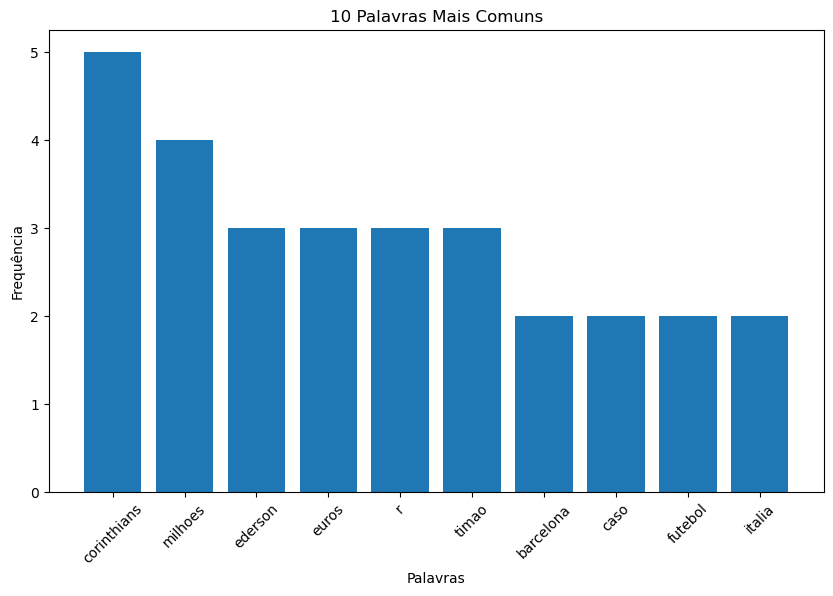

In [249]:
first_ten_elements = sorted_ttt[:10]

palavras = []
contagens = []
# Obter os 10 tokens mais comuns e suas contagens
for word, count in first_ten_elements:
    palavras.append(word)
    contagens.append(count)


# Gráfico de Barras
plt.figure(figsize=(10, 6))
plt.bar(palavras, contagens)
plt.xlabel('Palavras')
plt.ylabel('Frequência')
plt.title('10 Palavras Mais Comuns')
plt.xticks(rotation=45)
plt.show()

### NLTK

In [41]:
for i in range(len(token_text)):
    token_text[i] = " ".join(token_text[i])
print(token_text[0])

In [42]:
df_balanceado['texto'] = token_text
df_balanceado.head(5)

,titulo,texto,link,resumo,categoria,data_hora
0,Ituano x Chapecoense: tempo real e onde assist...,,https://www.cnnbrasil.com.br/esportes/ituano-x...,Onde assistir e tempo real dos lances e das es...,esportes,2023-11-17 14:20:18
1,Chelsea intensifica conversas com Gabriel Mosc...,chelsea mantem firme ideia contratar volante g...,https://www.cnnbrasil.com.br/esportes/chelsea-...,Clube paulista já recusou uma proposta dos ing...,esportes,2023-11-09 14:04:55
2,Ex-jogador Fred deita no chão após assalto no ...,camera seguranca mostrou momento exjogador fut...,https://www.cnnbrasil.com.br/esportes/ex-jogad...,Imagens de câmeras de segurança mostram três c...,esportes,2023-11-24 11:50:29
3,Esposa de Daniel Alves dá entrevista polêmica ...,esposa daniel alves preso desde janeiro suspei...,https://www.cnnbrasil.com.br/esportes/esposa-d...,"Alves foi preso no dia 20 de janeiro, pouco me...",esportes,2023-11-25 20:39:52
4,Diniz faz mistério em escalação do Fluminense ...,fernando diniz nao quis saber dar pistas sobre...,https://www.cnnbrasil.com.br/esportes/diniz-fa...,Treinador lamentou episódios ocorridos na últi...,esportes,2023-11-03 21:17:20


In [43]:
col = ['categoria', 'texto']
df_balanceado = df_balanceado[col]

In [44]:
df_balanceado.head()

,categoria,texto
0,esportes,
1,esportes,chelsea mantem firme ideia contratar volante g...
2,esportes,camera seguranca mostrou momento exjogador fut...
3,esportes,esposa daniel alves preso desde janeiro suspei...
4,esportes,fernando diniz nao quis saber dar pistas sobre...


In [45]:
df_balanceado['category_id'] = df_balanceado['categoria'].factorize()[0]
from io import StringIO
category_id_df = df_balanceado[['categoria', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'categoria']].values)
df_balanceado.head()

,categoria,texto,category_id
0,esportes,,0
1,esportes,chelsea mantem firme ideia contratar volante g...,0
2,esportes,camera seguranca mostrou momento exjogador fut...,0
3,esportes,esposa daniel alves preso desde janeiro suspei...,0
4,esportes,fernando diniz nao quis saber dar pistas sobre...,0


In [46]:
## Bag of Words model - TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words=sw)
features = tfidf.fit_transform(df_balanceado['texto']).toarray()
labels = df_balanceado.category_id
features.shape

(2700, 20210)

In [47]:
from sklearn.feature_selection import chi2
import numpy as np

N = 2

for categoria, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names_out())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(categoria))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'economia':
  . Most correlated unigrams:
. mercado
. bilhoes
  . Most correlated bigrams:
. reforma tributaria
. banco central
# 'entretenimento':
  . Most correlated unigrams:
. fas
. cantora
  . Most correlated bigrams:
. post shared
. shared by
# 'esportes':
  . Most correlated unigrams:
. rodada
. campeonato
  . Most correlated bigrams:
. originalmente itatiaia
. itatiaia versao
# 'internacional':
  . Most correlated unigrams:
. gaza
. israel
  . Most correlated bigrams:
. defesa israel
. faixa gaza
# 'nacional':
  . Most correlated unigrams:
. civil
. policia
  . Most correlated bigrams:
. defesa civil
. policia civil
# 'politica':
  . Most correlated unigrams:
. supremo
. stf
  . Most correlated bigrams:
. supremo tribunal
. tribunal federal


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df_balanceado['texto'], df_balanceado['categoria'], random_state = 2)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score

models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

/home/hworld/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/hworld/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/hworld/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/hworld/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/hworld/.local/lib/python3.10/s

In [50]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.913704
LogisticRegression        0.898148
MultinomialNB             0.891111
RandomForestClassifier    0.791481
Name: accuracy, dtype: float64

In [51]:
from sklearn.model_selection import train_test_split

model = LinearSVC()

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df_balanceado.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

/home/hworld/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [52]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred,target_names=df_balanceado['categoria'].unique()))

                precision    recall  f1-score   support

      esportes       0.98      0.99      0.99       140
      nacional       0.88      0.86      0.87       147
 internacional       0.94      0.92      0.93       159
      economia       0.89      0.91      0.90       137
      politica       0.89      0.84      0.87       141
entretenimento       0.93      0.98      0.95       167

      accuracy                           0.92       891
     macro avg       0.92      0.92      0.92       891
  weighted avg       0.92      0.92      0.92       891

